#importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.image import resize
from tensorflow.keras.utils import to_categorical
from IPython.display import Audio
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

#Visualizing the audio


In [ ]:
audio_file="/content/drive/MyDrive/music_genre/Data/genres_original/blues/blues.00000.wav"

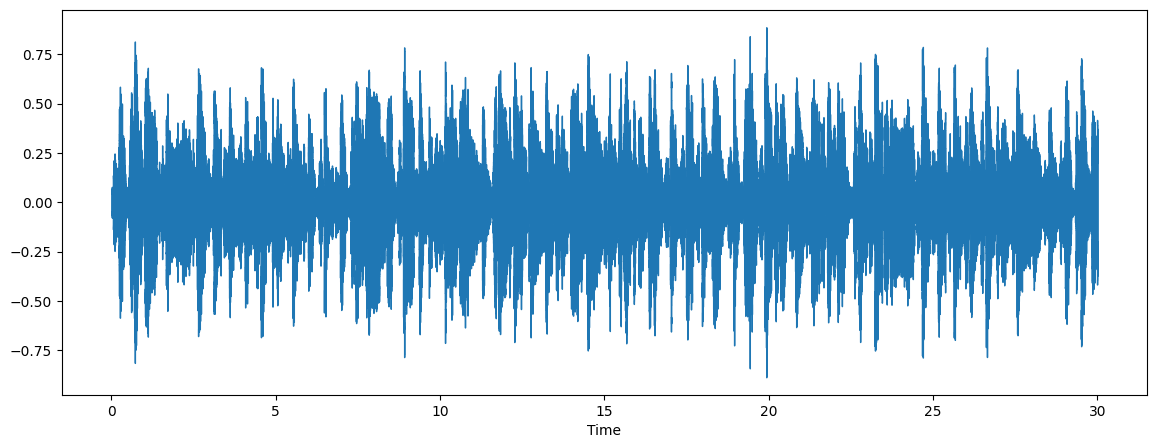

In [ ]:
y,sr=librosa.load(audio_file,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

playing audio

In [ ]:
from IPython.display import Audio
Audio(data=y,rate=sr)

#dividing audio into chunks

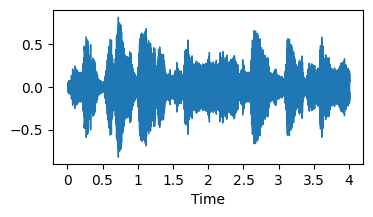

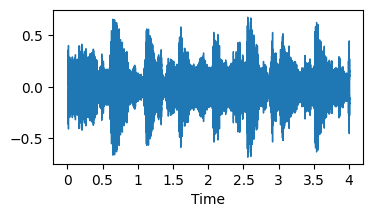

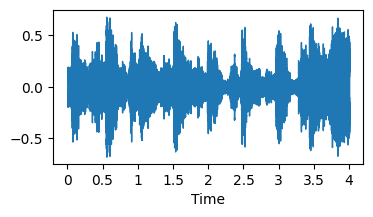

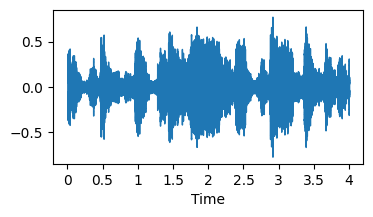

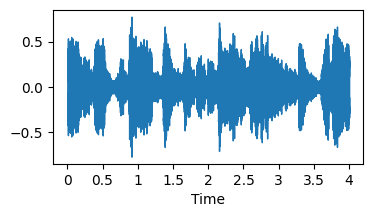

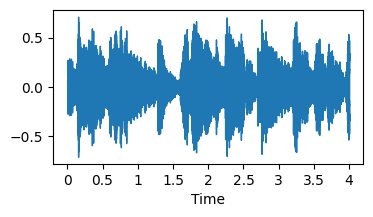

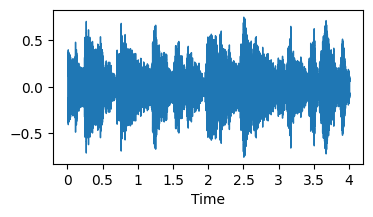

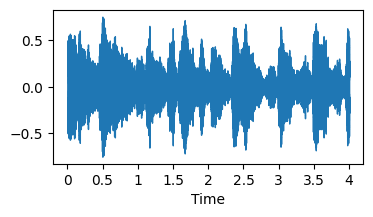

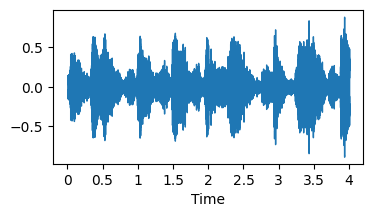

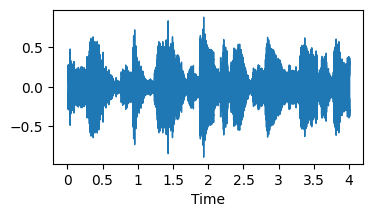

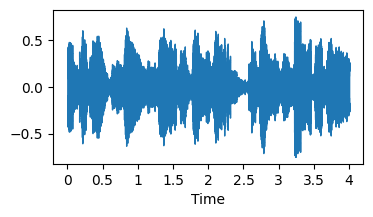

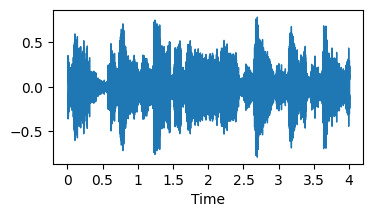

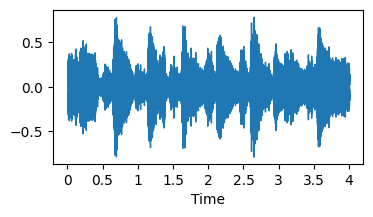

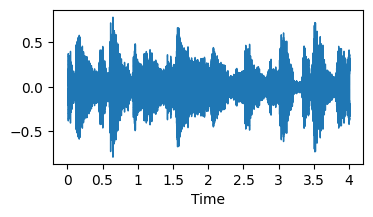

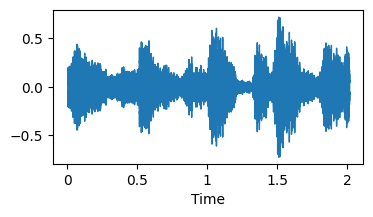

In [ ]:
audio_file="/content/drive/MyDrive/music_genre/Data/genres_original/blues/blues.00000.wav"
y,sr=librosa.load(audio_file,sr=None)

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()


Visualizing melspectrogram for 30sec audio

In [ ]:
def melspec(y=y,sr=sr):
    melspectrogram=librosa.feature.melspectrogram(y=y,sr=sr)
    spec_to_db=librosa.power_to_db(melspectrogram,ref=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spec_to_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

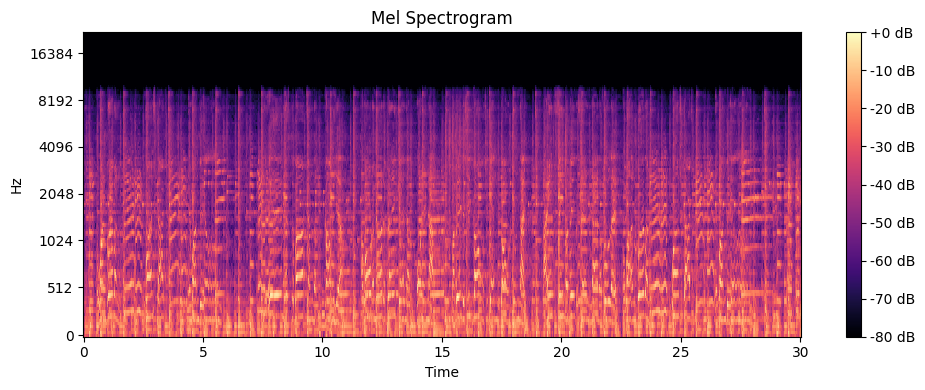

In [ ]:
audio_file="/content/drive/MyDrive/music_genre/Data/genres_original/blues/blues.00000.wav"
y,sr=librosa.load(audio_file,sr=44100)
melspec(y,sr)

visualizing melspectrogram of audio chunks


In [ ]:
def melspec_chunk(y=y,sr=sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds

    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        # Extract the chunk of audio
        chunk = y[start:end]
        melspectrogram=librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(melspectrogram.shape)
        spec_to_db=librosa.power_to_db(melspectrogram,ref=np.max)
        plt.figure(figsize=(6,3))
        librosa.display.specshow(spec_to_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 345)


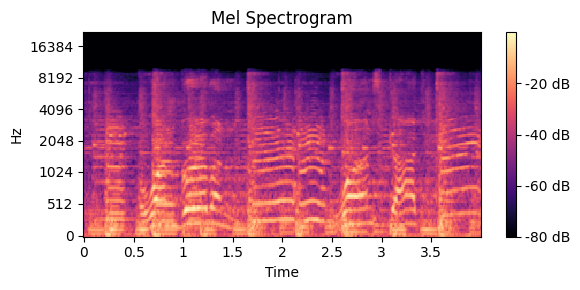

(128, 345)


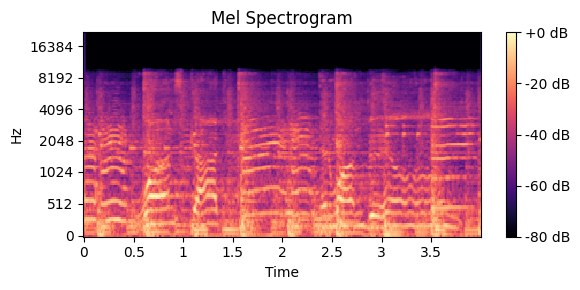

(128, 345)


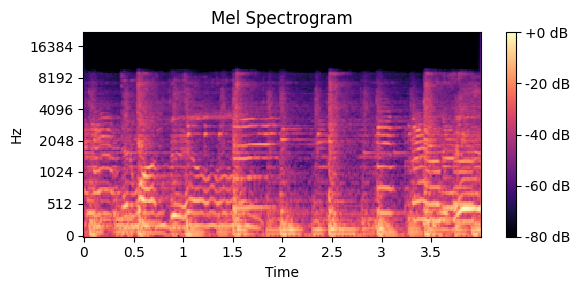

(128, 345)


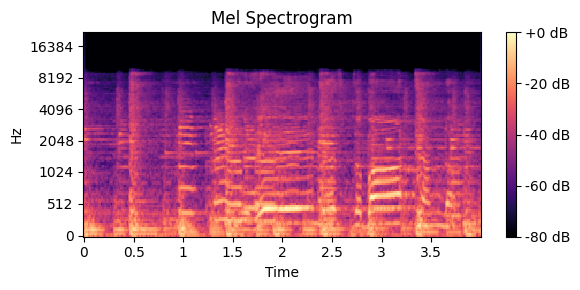

(128, 345)


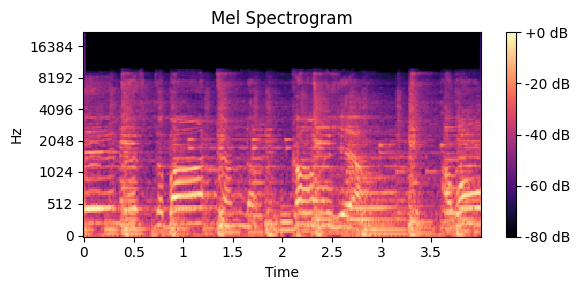

(128, 345)


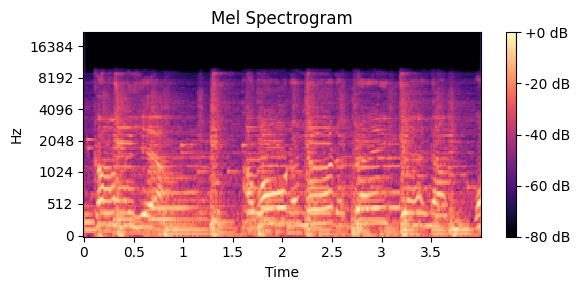

(128, 345)


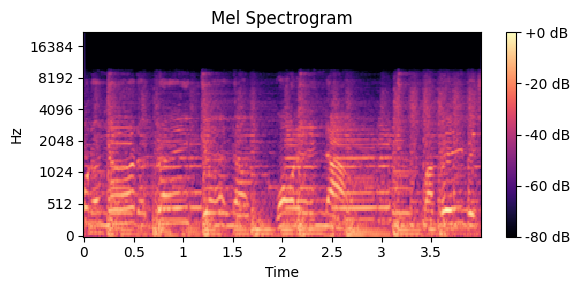

(128, 345)


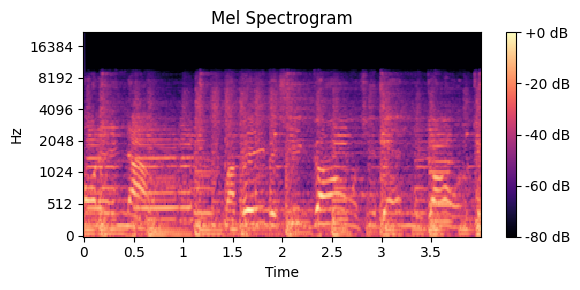

(128, 345)


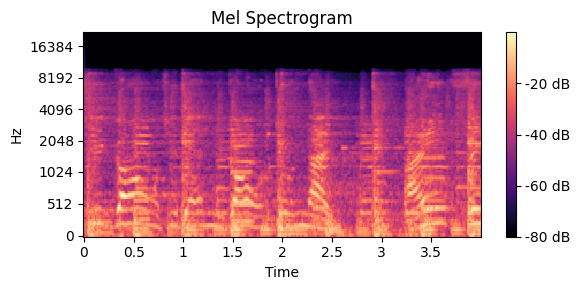

(128, 345)


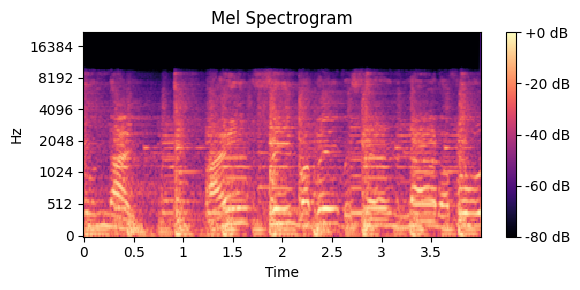

(128, 345)


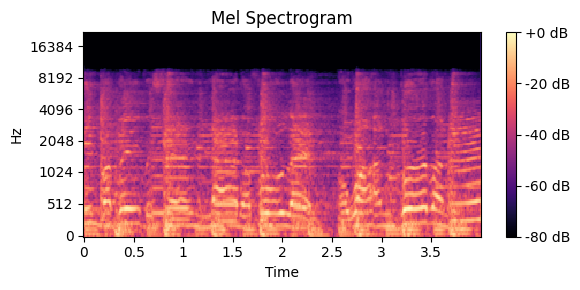

(128, 345)


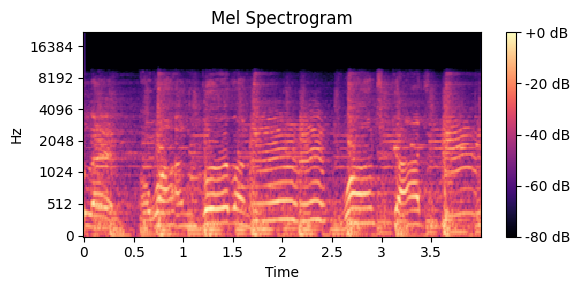

(128, 345)


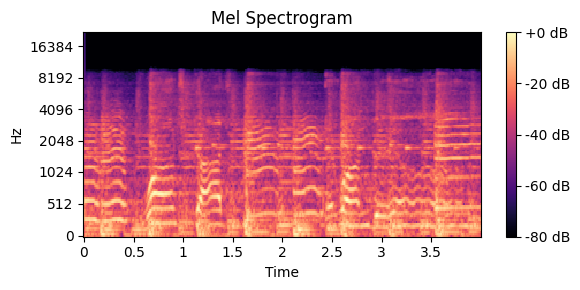

(128, 345)


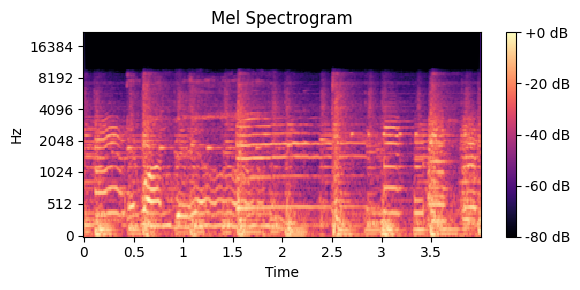

(128, 174)


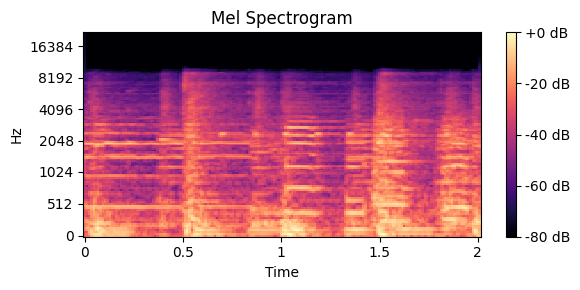

In [ ]:
audio_file="/content/drive/MyDrive/music_genre/Data/genres_original/blues/blues.00000.wav"
y,sr=librosa.load(audio_file,sr=44100)
melspec_chunk(y,sr)

In [ ]:
128*345 #total no of elements in mel_spectograms

44160

In [ ]:
210*210

44100

#data preprocessing

In [ ]:
#define  folder structure
data_dir = "/content/drive/MyDrive/music_genre/Data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [ ]:
def data_preprocessing(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]
    for i_index,genre in enumerate(classes):
       class_dir=os.path.join(data_dir,genre)
       print("Processing--",genre)
       for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path=os.path.join(class_dir,filename)
                audio_data,sample_rate=librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds

                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    melspectrogram=librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Reshape melspectogram to target shaped
                    melspectrogram=resize(np.expand_dims(melspectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(melspectrogram)
                    labels.append(i_index)
    #return data and labels
    return np.array(data),np.array(labels)

In [ ]:
data,labels = data_preprocessing(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [ ]:
data.shape

(14975, 150, 150, 1)

In [ ]:
labels.shape

(14975,)

#label Encoding


In [ ]:
labels = to_categorical(labels,num_classes = len(classes))

In [ ]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
labels.shape

(14975, 10)

#Splitting of Dataset into Training and Test set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(11980, 150, 150, 1)

In [ ]:
x_test.shape

(2995, 150, 150, 1)

In [ ]:
y_train.shape

(11980, 10)

In [ ]:
y_test.shape

(2995, 10)

#Building Model

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
x_train[0].shape

(150, 150, 1)

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1200,activation='relu'))

In [ ]:
model.add(Dropout(0.45))

In [ ]:
model.add(Dense(units=len(classes),activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#training

In [ ]:
training_history=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))

In [ ]:
model.save("Trained_model.h5")

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
#  downloding the Trained_model.h5 and training_hist.json files

from google.colab import files

files.download('Trained_model.h5')
files.download('training_hist.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train

array([[[[2.36686087e+00],
         [1.27769458e+00],
         [2.61859030e-01],
         ...,
         [3.43094140e-01],
         [3.91402721e-01],
         [7.89127827e-01]],

        [[1.35729504e+01],
         [2.78078136e+01],
         [3.06262264e+01],
         ...,
         [1.97610435e+01],
         [2.12268047e+01],
         [1.14851055e+01]],

        [[4.04596786e+01],
         [1.05553772e+02],
         [1.34845642e+02],
         ...,
         [6.26774902e+01],
         [3.65788040e+01],
         [2.67447834e+01]],

        ...,

        [[1.26282321e-04],
         [2.60884881e-05],
         [6.99425868e-07],
         ...,
         [6.24871018e-06],
         [5.04642594e-06],
         [6.10624147e-06]],

        [[1.24118174e-04],
         [2.54174684e-05],
         [5.29746877e-08],
         ...,
         [5.84047314e-07],
         [8.61000217e-07],
         [3.59166938e-06]],

        [[1.23177815e-04],
         [2.51855490e-05],
         [5.14702370e-09],
         ...,
 

In [ ]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,460 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [ ]:
training_history_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Model Evaluation

In [ ]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(x_train,y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.9649 - loss: 0.1318


In [ ]:
train_loss,train_accuracy

(0.12470407783985138, 0.9658597707748413)

In [ ]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(x_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9574 - loss: 0.1511


In [ ]:
val_loss,val_accuracy

(0.1281023472547531, 0.9616026878356934)

In [ ]:
training_history_data['val_loss']

[1.708251714706421,
 1.3402396440505981,
 1.0873081684112549,
 0.9003298282623291,
 0.8636239171028137,
 0.636425256729126,
 0.6900743842124939,
 0.6760871410369873,
 0.5397913455963135,
 0.7358826994895935,
 0.5309751033782959,
 0.4382426142692566,
 0.5314857959747314,
 0.4402756989002228,
 0.4111586809158325,
 0.343301385641098,
 0.42800334095954895,
 0.4111294150352478,
 0.40749606490135193,
 0.4133428633213043,
 0.4199633300304413,
 0.46176016330718994,
 0.4554539620876312,
 0.3618141710758209,
 0.39496833086013794,
 0.40918493270874023,
 0.46695876121520996,
 0.40162619948387146,
 0.48460492491722107,
 0.419253945350647]

Accuracy and Loss Visualization

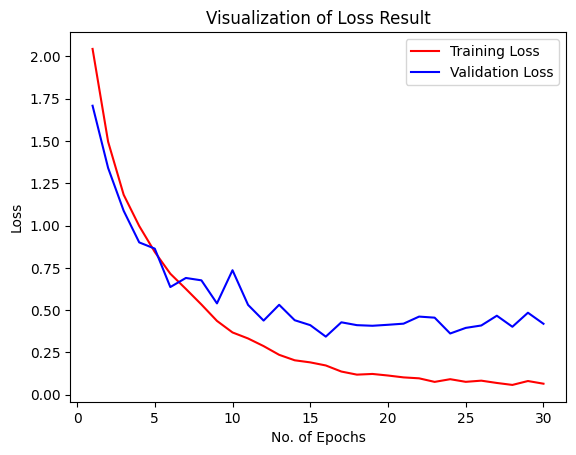

In [ ]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

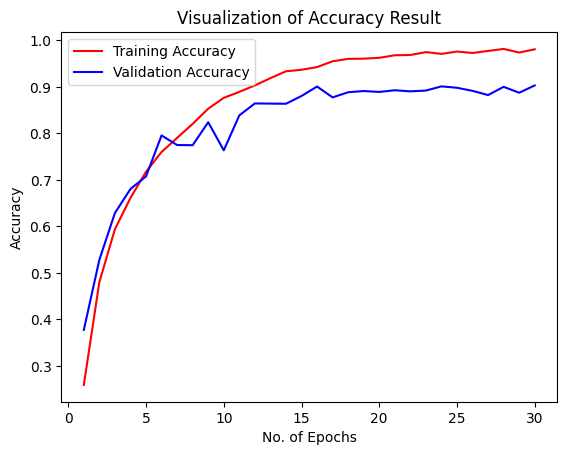

In [ ]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Precision,Recall,Confusion Matrix

In [ ]:
x_test.shape

(2995, 150, 150, 1)

In [ ]:
y_pred = model.predict(x_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step


array([[2.16454529e-04, 1.62833345e-07, 2.22215283e-04, ...,
        9.83950496e-01, 1.14090399e-04, 1.66643271e-03],
       [5.69911099e-05, 1.75315404e-06, 1.42249875e-04, ...,
        1.43335683e-07, 4.52233053e-06, 1.24815488e-02],
       [5.36768390e-08, 7.85475081e-08, 1.32422514e-07, ...,
        3.69535587e-06, 1.56838439e-06, 6.54967880e-06],
       ...,
       [9.37295675e-01, 2.15503067e-04, 5.84292710e-02, ...,
        7.22058991e-04, 1.02034464e-04, 3.58446501e-04],
       [5.06655717e-10, 9.99997377e-01, 9.59115987e-09, ...,
        2.69320299e-08, 1.26406174e-08, 5.27805469e-07],
       [1.14397491e-09, 3.34547724e-14, 7.33282532e-11, ...,
        1.95710512e-04, 3.47143100e-07, 5.99239968e-07]], dtype=float32)

In [ ]:
y_pred.shape

(2995, 10)

In [ ]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4])

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test.shape

(2995, 10)

In [ ]:
true_categories = np.argmax(y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [ ]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.98      0.94      0.96       302
   classical       0.97      0.99      0.98       298
     country       0.83      0.97      0.90       317
       disco       0.99      0.96      0.97       312
      hiphop       0.99      0.98      0.98       277
        jazz       0.96      0.98      0.97       311
       metal       0.98      0.99      0.99       302
         pop       0.98      0.95      0.97       289
      reggae       1.00      0.94      0.97       296
        rock       0.97      0.91      0.94       291

    accuracy                           0.96      2995
   macro avg       0.97      0.96      0.96      2995
weighted avg       0.96      0.96      0.96      2995



Confusion Matrix Visualization

In [ ]:
cm

array([[284,   1,  17,   0,   0,   0,   0,   0,   0,   0],
       [  0, 295,   0,   1,   0,   2,   0,   0,   0,   0],
       [  2,   1, 309,   0,   0,   5,   0,   0,   0,   0],
       [  1,   0,   8, 298,   1,   0,   1,   0,   0,   3],
       [  1,   0,   0,   1, 271,   0,   0,   4,   0,   0],
       [  0,   5,   1,   0,   0, 304,   0,   0,   0,   1],
       [  0,   0,   1,   0,   0,   0, 300,   0,   0,   1],
       [  1,   0,   7,   1,   1,   0,   1, 275,   0,   3],
       [  1,   0,   9,   0,   1,   4,   0,   1, 279,   1],
       [  0,   1,  19,   1,   0,   1,   4,   0,   0, 265]])

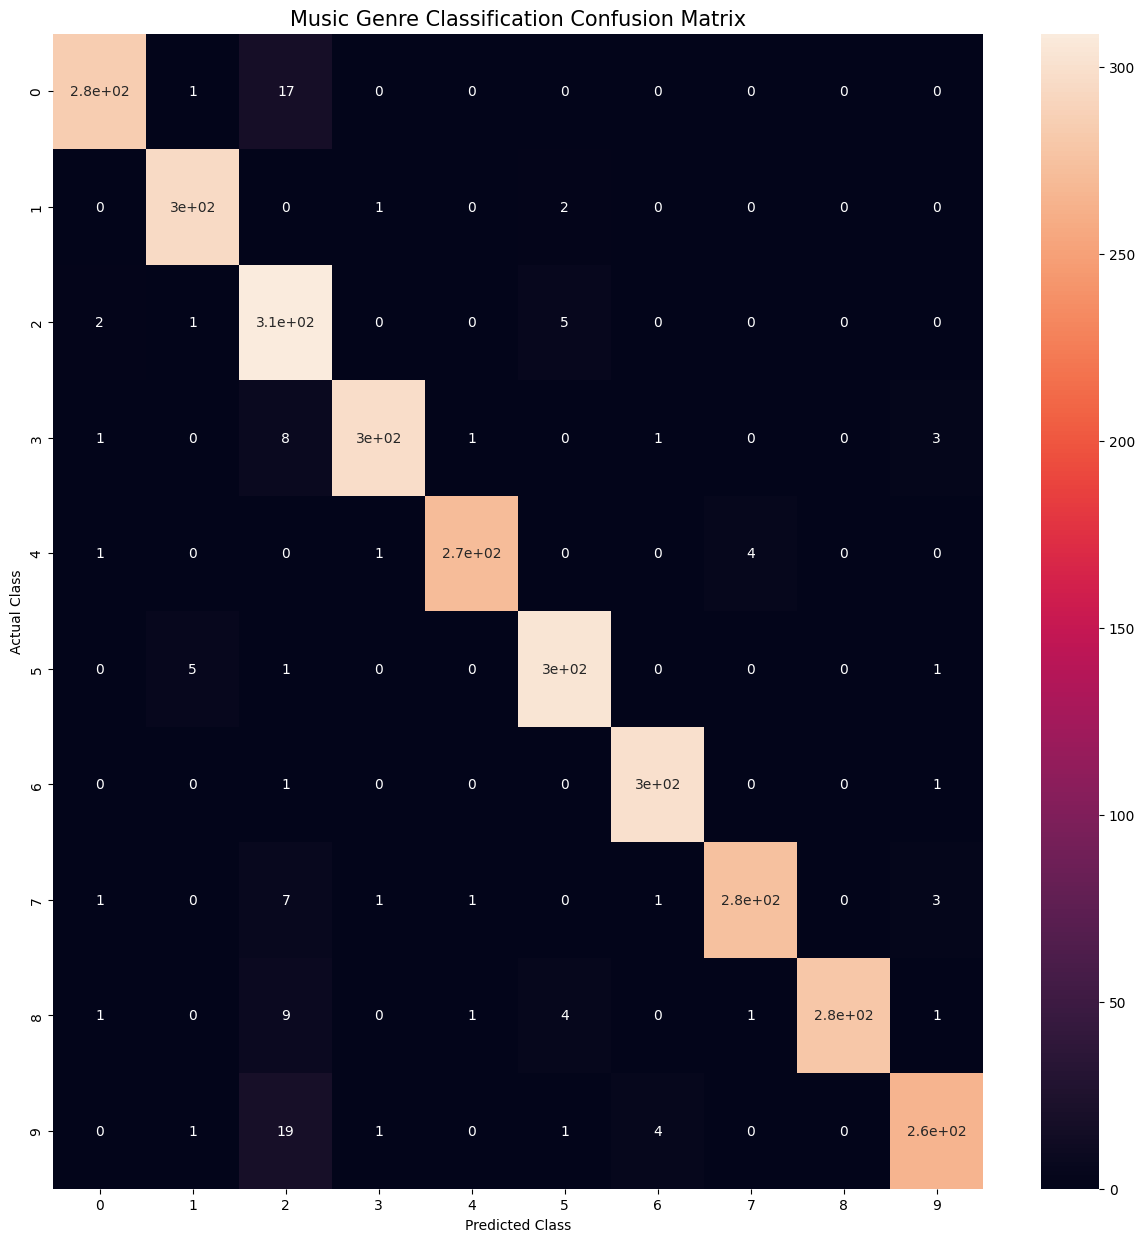

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()